# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Linda Amelia Putri]
- **Email:** [liameliaputri19@gmail.com]
- **ID Dicoding:** [Linda Amelia Putri]

## Menentukan Pertanyaan Bisnis

- Kapan waktu yang menunjukkan rata-rata penggunaan sepeda paling tinggi dan paling rendah yang dilakukan oleh pengguna terdaftar (registered) dan tidak terdaftar (casual) dalam sehari?
- Bagaimana pengaruh kondisi cuaca di setiap musim yang berbeda terhadap intensitas pengguna sepeda?

## Import Semua Packages/Library yang Digunakan

Memanggil semua library yang dibutuhkan:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat tabel penggunaan sepeda berdasarkan jam

In [3]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Memuat tabel penggunaan sepeda berdasarkan hari

In [4]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Data memuat informasi mengenai waktu dalam satuan jam (hr), total pengguna terdaftar (registered) dan pengguna kasual (casual) sehingga relevan untuk mengidentifikasi waktu dengan pola aktivitas penggunaan sepeda tertinggi.
- Data memuat informasi terkait cuaca (weathersit), musim (season) dan total pengguna sepeda (cnt) sehingga relevan untuk menganalisis pola penggunaan sepeda berdasarkan kondisi cuaca pada musim yang berbeda.

### Assessing Data

Memeriksa tipe data dari tiap kolom yang digunakan dalam hour_df

In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Menampilkan informasi jumlah missing value setiap kolom

In [6]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Memeriksa duplikasi data dalam setiap kolom

In [7]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Menampilkan ringkasan parameter statistik data hour_df

In [8]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Memeriksa tipe data dari tiap kolom yang digunakan dalam day_df

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Menampilkan informasi jumlah missing value setiap kolom

In [10]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Memeriksa duplikasi data dalam setiap kolom

In [11]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Menampilkan ringkasan parameter statistik

In [12]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Jumlah data pada hour_df telah lengkap tanpa ditemukan adanya missing value, tidak terdapat duplikasi dan keanehan nilai pada hour_df. Akan tetapi, terdapat kesalahan tipe data pada kolom dteday yang seharusnya direpresentasikan sebagai tipe data datetime bukan object (yang umumnya digunakan untuk tipe data string)
- Data pada day_df sudah lengkap dan tidak terdapat missing value, namun tipe data pada kolom dteday seharusnya menggunakan tipe data datetime. Selain itu, tidak ditemukan adanya duplikasi dan keanehan nilai pada day_df.

### Cleaning Data

Mengganti tipe data pada kolom dteday menjadi datetime pada hour_df

In [13]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

Memeriksa tipe data pada hour_df

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Mengganti tipe data pada kolom dteday menjadi datetime pada day_df

In [15]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

Memeriksa tipe data pada day_df

In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Kolom dteday pada hour_df telah dilakukan perubahan tipe data yang awalnya menggunakan object menjadi datetime untuk memudahkan analisis waktu dengan lebih akurat
- Kolom dteday pada day_df telah diubah menjadi tipe data datetime untuk mendukung keakuratan analisis waktu

## Exploratory Data Analysis (EDA)

### Explore Data hour_df

Menampilkan ringkasan parameter statistik data hour_df

In [17]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Melakukan analisis pada data hour_df

In [18]:
# Mengelompokkan data berdasarkan jam dan menghitung total serta rata-rata pengguna
hourly_usage = hour_df.groupby(by='hr').agg({
    'registered' : ['sum', 'mean'],
    'casual' : ['sum', 'mean']
}).reset_index()

# Membulatkan rata-rata jumlah pengguna sepeda
hourly_usage['registered'] = hourly_usage['registered'].round()
hourly_usage['casual'] = hourly_usage['casual'].round()

# Menyesuaikan nama kolom
hourly_usage.columns = ['hour', 'registered_total', 'registered_mean', 'casual_total', 'casual_mean']

# Mendapatkan jam dengan jumlah pengguna terdaftar tertinggi dan terendah
max_registered_hour = hourly_usage.loc[hourly_usage['registered_mean'].idxmax(), 'hour']
min_registered_hour = hourly_usage.loc[hourly_usage['registered_mean'].idxmin(), 'hour']

# Mendapatkan jam dengan jumlah pengguna tidak terdaftar tertinggi dan terendah
max_casual_hour = hourly_usage.loc[hourly_usage['casual_mean'].idxmax(), 'hour']
min_casual_hour = hourly_usage.loc[hourly_usage['casual_mean'].idxmin(), 'hour']

# Menampilkan hasil
print(f"Registered Users:")
print(f"Peak Time: {max_registered_hour}: 00 (Count: {hourly_usage['registered_mean'].max()})")
print(f"Low Time: {min_registered_hour}: 00 (Count: {hourly_usage['registered_mean'].min()})")

print(f"Casual Users:")
print(f"Peak Time: {max_casual_hour}: 00 (Count: {hourly_usage['casual_mean'].max()})")
print(f"Low Time: {min_casual_hour}: 00 (Count: {hourly_usage['casual_mean'].min()})")

Registered Users:
Peak Time: 17: 00 (Count: 387.0)
Low Time: 4: 00 (Count: 5.0)
Casual Users:
Peak Time: 14: 00 (Count: 76.0)
Low Time: 4: 00 (Count: 1.0)


### Explore Data day_df

Menampilkan ringkasan parameter statistik data day_df

In [19]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Melakukan analisis pada data day_df

In [20]:
# Mengelompokkan data berdasarkan musim dan kondisi cuaca serta menghitung rata-rata pengguna sepeda
season_weather_usage = day_df.groupby(['season', 'weathersit']).agg(
    bike_users = ('cnt', 'mean')
).reset_index()

# Membulatkan rata-rata jumlah pengguna sepeda
season_weather_usage['bike_users'] = season_weather_usage['bike_users'].round()

# Mengurutkan data berdasarkan jumlah pengguna sepeda secara menurun
season_weather_usage.sort_values(by='bike_users', ascending= False, inplace= True)

# Mengubah nilai numerik pada kolom 'season' menjadi deskripsi nama musim
season_weather_usage['season'] = season_weather_usage['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

# Mengubah nilai numerik pada kolom 'weathersit' menjadi deskripsi kondisi cuaca
season_weather_usage['weathersit'] = season_weather_usage['weathersit'].map({
    1: 'Clear',
    2: 'Mist/Cloudy',
    3: 'Rain/Snow',
    4: 'Extreme'
})

# Menampilkan hasil
print(season_weather_usage.to_string(index=False))

season  weathersit  bike_users
  Fall       Clear      5878.0
Summer       Clear      5549.0
  Fall Mist/Cloudy      5222.0
Winter       Clear      5044.0
Winter Mist/Cloudy      4654.0
Summer Mist/Cloudy      4237.0
Spring       Clear      2811.0
  Fall   Rain/Snow      2752.0
Spring Mist/Cloudy      2357.0
Winter   Rain/Snow      1962.0
Summer   Rain/Snow      1169.0
Spring   Rain/Snow       935.0


**Insight:**
- Menurut ringkasan parameter statistik dari data hour_df dan day_df menunjukkan bahwa rata-rata pengguna terdaftar lebih banyak dibandingkan dengan pengguna tidak terdaftar.  
- Berdasarkan hasil analisis pada hour_df, diketahui bahwa rata-rata aktivitas pengguna sepeda terdaftar paling tinggi yaitu pada pukul 17.00 yang mana pada jam tersebut kemungkinan besar dikaitkan dengan aktivitas di sore hari seperti perjalanan pulang kerja, rekreasi atau kegiatan lainnya.Sedangkan pada pengguna tidak terdaftar waktu paling tinggi berada pada pukul 14.00 yang merupakan waktu ideal untuk aktivitas santai seperti kegiatan wisata, hiburan dan rekreasi dengan cuaca yang cenderung cerah pda jam tersebut.

  Pada pukul 04.00 merupakan waktu penggunaan paling rendah bagi pengguna terdaftar dan tidak terdaftar mengingat pada jam tersebut adalah waktu dini hari dimana sebagian besar orang masih beristirahat dan aktivitas yang berjalan di luar sangat rendah.   
- Berdasarkan hasil diatas, aktivitas pengguna paling tinggi terjadi secara konsisten pada cuaca cerah di semua musim kemudian pola penggunaan cenderung menurun saat cuaca mengalami mendung atau berkabut dan semakin rendah saat cuaca hujan atau bersalju.

  Jika dilihat berdasarkan musim diketahui bahwa aktivitas penggunaan tertinggi terjadi pada musim gugur dan musim panas. Aktivitas dengan penggunaan sedang terjadi pada musim dingin terutama saat cuaca cerah dan pada musim semi cenderung rendah kemungkinan besar dikaitkan dengan cuaca yang kurang mendukung

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Membuat line chart terkait Jumlah Pengguna Berdasarkan Jam

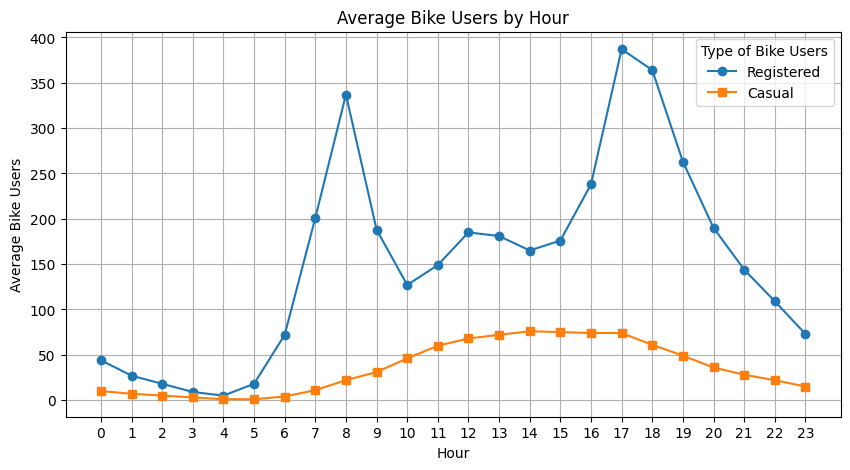

In [21]:
plt.figure(figsize=(10, 5))

plt.plot(hourly_usage['hour'], hourly_usage['registered_mean'], marker='o', label='Registered')
plt.plot(hourly_usage['hour'], hourly_usage['casual_mean'], marker='s', label='Casual')

plt.title('Average Bike Users by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Bike Users')
plt.xticks(range(0, 24))
plt.legend(title='Type of Bike Users')
plt.grid(True)
plt.show()

### Pertanyaan 2:

Membuat bar chart terkait Rata-rata Jumlah Pengguna Berdasarkan Musim dan Kondisi Cuaca

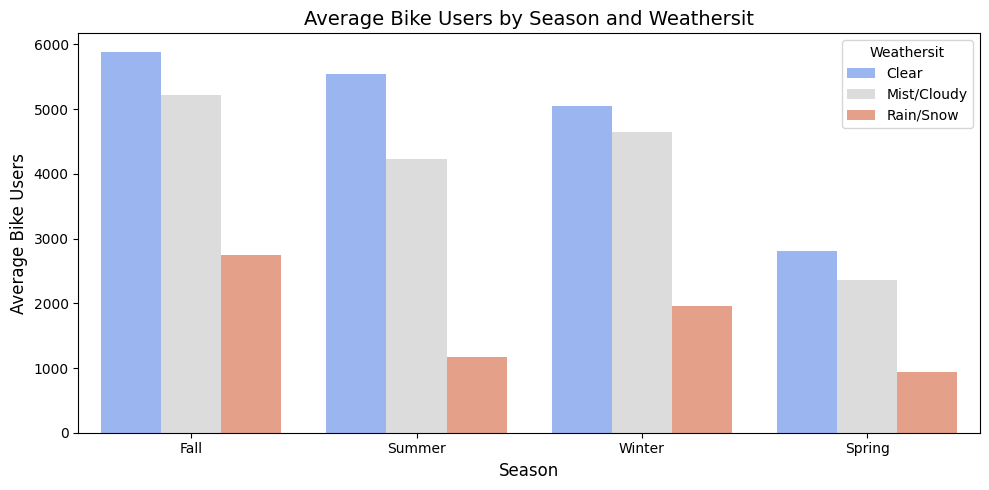

In [22]:
plt.figure(figsize=(10, 5))

sns.barplot(data=season_weather_usage, x='season', y='bike_users', hue='weathersit', palette='coolwarm')

plt.title("Average Bike Users by Season and Weathersit", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Average Bike Users", fontsize=12)
plt.legend(title="Weathersit")
plt.tight_layout()
plt.show()

**Insight:**
- Penggunaan dengan aktivitas yang cenderung tinggi pada pengguna terdaftar berada pada waktu pagi pukul 08.00 dan sore hari yaitu rentang pukul 17.00-18.00 yang kemungkinan besar penggunaan layanan berkaitan dengan aktivitas kantor ataupun sekolah. Sedangkan pada pengguna tidak terdaftar pola penggunaannya cenderung stabil dan sedikit mengalami peningkatan pada waktu siang hingga sore hari dimana pengguna paling tinggi terdapat pada waktu pukul 14.00.
- Rata-rata aktivitas pengguna sepeda pada cuaca cerah di semua musim cenderung mendominasi dibandingkan cuaca lainnya . Pada cuaca berkabut atau mendung, aktivitas pengguna cenderung menurun dan lebih rendah lagi saat cuaca hujan atau bersalju. Berdasarkan hasil diatas, aktivitas penggunaan pada musim semi cenderung lebih rendah jika dibandingkan dengan musim panas, gugur dan musim dingin kemungkinan besar berkaitan dengan kondisi cuaca yang kurang stabil.

## Analisis Lanjutan (Opsional)

Membuat analisis RFM dan visualisasi

In [23]:
# Mengelompokkan data berdasarkan tanggal untuk menghitung jumlah dan total pengguna sepeda
rfm_df = hour_df.groupby(by=["dteday"], as_index=False).agg({
    "cnt": ["count", "sum"]
})

# Memberikan nama kolom baru pada DataFrame
rfm_df.columns = ["dteday", "frequency", "monetary"]

recent_date = day_df["dteday"].max() # Mengidentifikasi tanggal terbaru dari dataset 'day_df'
rfm_df["recency"] = rfm_df["dteday"].apply(lambda x: (recent_date -x).days) # Menambahkan kolom 'Recency'

print(rfm_df.head())

      dteday  frequency  monetary  recency
0 2011-01-01         24       985      730
1 2011-01-02         23       801      729
2 2011-01-03         22      1349      728
3 2011-01-04         23      1562      727
4 2011-01-05         23      1600      726


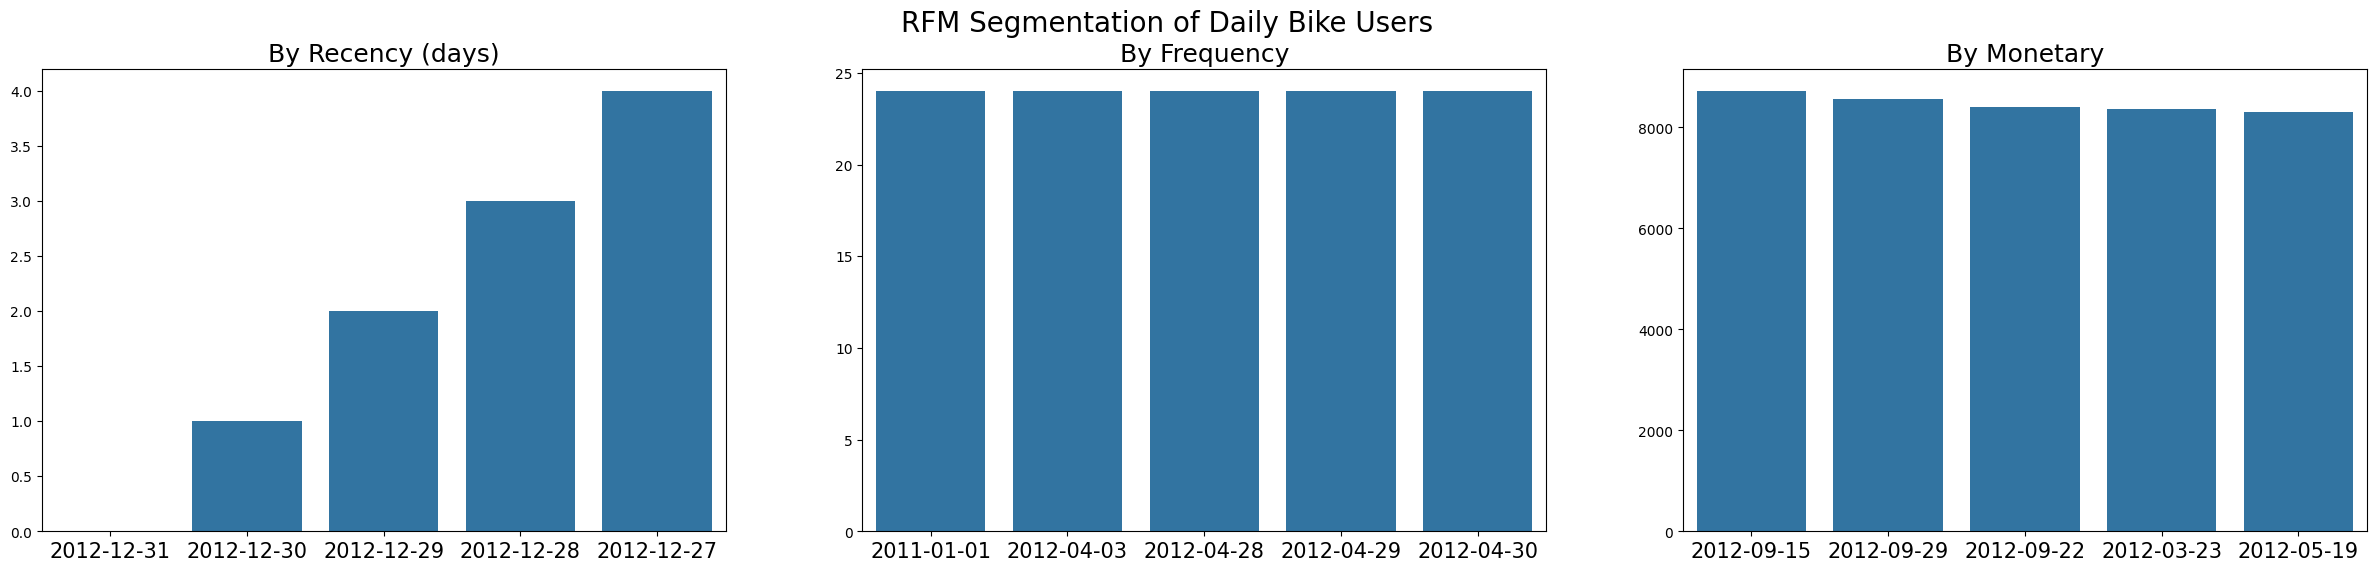

In [24]:
# Membuat Bar Chart terkait Segmentasi Pengguna Sepeda Harian Berdasarkan Analisis RFM
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#1F77B4", "#1F77B4", "#1F77B4", "#1F77B4", "#1F77B4"]

sns.barplot(y="recency", x="dteday", hue="dteday", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="dteday", hue="dteday", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="dteday", hue="dteday", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("RFM Segmentation of Daily Bike Users", fontsize=20)
plt.show()

## Conclusion

- Pola penggunaan sepeda  tertinggi yaitu pada pengguna terdaftar yang memiliki jam padat terfokus pada waktu pagi terutama pukul 08.00 dan sore hari pukul 17.00-18.00 yang menunjukkan kaitannya dengan kegiatan rutinan seperti bekerja atau bersekolah. Pada pengguna tidak terdaftar cenderung lebih aktif pada waktu siang hari yang dikaitkan dengan aktivitas yang lebih santai seperti rekreasi atau wisata. Sedangkan waktu dengan aktivitas terendah yaitu pada pukul 04.00.

  Strategi Peningkatan Layanan:
  1. Mengoptimalkan penyediaan sepeda terutama pada pagi dan sore hari ketika jam padat aktivitas.
  2. Menyediakan layanan di area hiburan atau wisata untuk menningkatkan intensitas pengguna tidak terdaftar.

- Kondisi cuaca dan musim memiliki pengaruh yang signifikan terhadap intensitas pengguna sepeda. Pola penggunaan tertinggi yaitu saat cuaca cerah terutama pada musim panas dan musim gugur, kemudian menurun pada cuaca mendung atau berkabut dan paling rendah saat cuaca hujan atau bersalju.

  Strategi Peningkatan Layanan:
  1. Menyediakan perlengkapan seperti jas hujan untuk mendukung penggunaan sepeda di cuaca yang kurang baik.
  2. Merencanakan pemberian poin yang dapat ditukar dengan diskon sewa sebagai reward untuk loyalitas pengguna.
  3. Menyediakan dan meningkatkan fitur aplikasi bike sharing untuk mengirimkan pengingat mengenai cuaca yang mendukung aktivitas bersepeda.

Menyimpan berkas data yang telah dibersihkan:

In [25]:
hour_df.to_csv("hourly_df.csv", index=False)

In [26]:
day_df.to_csv("daily_df.csv", index=False)